# Image Processing
# Proj IV - Edge Detection

## 1. Introduction

<b>Edges are sudden changes in the values of pixels.</b> These changes may be caused by the boundaries of an object, variations in scene lighting, or other factors.


## 2. The gradient method
The gradient method says that edges are sudden changes in pixel values, so this implies high values of the gradient in that point (gradients are just derivaties, but in multi-dimensional spaces).

The algorithm computes the horizontal and vertical gradients of each pixel in the image, where:
 - <b>the horizontal gradient is the difference between the current pixel and the one on the right</b>
 $$dx = I[i,j]-I[i,j-1]$$
 - <b>the vertical gradient is the difference between the current pixel and the one below</b>
 $$dy = I[i,j]-I[i-1,j]$$

Knowing the gradients, the edge strength is the magnitude of the gradient:
$$O[i,j] = \sqrt{dx^2+dy^2}$$

<img src="media/derivative1.png"><center>Figure 2.1. Gradient computation</center>

There are some other alternate solutions for computing the horizontal and vertical gradients:
- subtract the pixels on the left and above, instead of right and below
- subtract the pixel below from the pixel above and the pixel on the right from the pixel on the left

<i>Computing the gradients is nothing more than filtering the image with some particular kernels! Think about it. How would you define the 3x3 kernels for the two gradients?</i>


## 3. The compass method

Unlike the gradient method, the compass method computes 4 absolute differences, between:
 - the left and right pixels
 - the top and bottom pixels
 - the top-left and bottom-right pixels
 - the top-right and bottom-left pixels
 
The edge strength is the biggest of the four differences.
<img src="media/compass.png"><center>The compass method</center>


## 4. Sobel operators
Noisy images will have noisy edges as well, since the values are altered. Some edges will be lost, and some new ones will appear. If the image were to be filtered with a average filter, the edges would be affected because of the blurring effect of this kind of filters.

To tackle this issue, Sobel filters are used, which both filter and detect edges. They do not blur the image when filtering, since they filter both sides of the edge separately.

To compute the edge, one must filter all pixels in the image with the four kernels (F1,F2,F3,F4). After that, the edge strength is the largest value resulted from the four filters. The kernels are presented in the figure below:
<img src="media/sobel.png"><center>Figure 4.1. The four kernels</center>

Based on the constant <b>C</b>, there are several kind of kernels:
 - if C=1 the kernels are called Prewitt kernels
 - if C=2 the kernels are called Sobel kernels
 - if C=$\sqrt{2}$ the kernels are called isotropic kernels

### Exercise 1. Implement the Gradient method on a noisy grayscale image:

(0) Write a function that applies the Gradient method on a grayscale image. Use the kernels in figure 2.1 when computing the horizontal and vertical gradients.  <br>
(1) Read an image and convert it to grayscale<br>
(2) Add Gaussian noise to the image<br>
(3) Apply the function written above on the original image and on the noisy image. Compare the results. What do you notice? How does the noise influence the contours. <br>

Hint for step 0: Be carefull to compute in all pixels where the kernels can be included inside the image. <br>
Hint for step 3: Be carefull what are the possible minimum and maximum values in the images to be able to compare them correctly

Text(0.5, 1.0, 'Filtered Noisy Image')

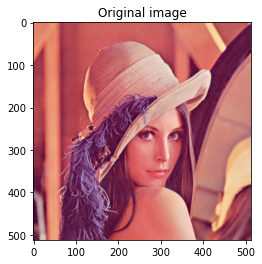

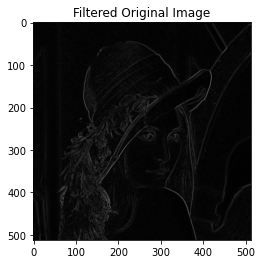

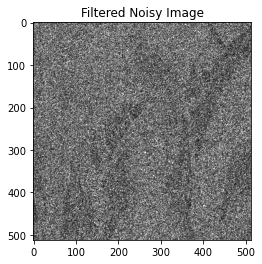

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,util,color

#(0)
def gradient_method(img):
    img_filtered=np.copy(img)
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            dx=img[i,j]-img[i,j-1]
            dy=img[i,j]-img[i-1,j]
            img_filtered[i,j]=np.sqrt(np.square(dx)+np.square(dy))
    return img_filtered
            
    
            
#(1)
img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)*255

#(2)
sigma = 70
N = np.random.normal(0, sigma, img_gray.shape)

# add the noise over the image. 
img_noise=np.copy(img_gray)
# Add the additive white noise
img_noise=img_noise+N 
# Take into account that the resulting image should have integer values in [0, 255] 
img_noise[img_noise>=255]=255
img_noise[img_noise<=0]=0

img_filtered_noisy=gradient_method(img_noise)
img_filtered=gradient_method(img_gray)

plt.figure(), plt.imshow(img_original)
plt.title("Original image")
plt.figure(), plt.imshow(img_filtered,cmap='gray',vmin=0,vmax=255)
plt.title("Filtered Original Image")
plt.figure(), plt.imshow(img_filtered_noisy,cmap='gray',vmin=0,vmax=255)
plt.title("Filtered Noisy Image")

# If we filter the original grayscale image we can see the contours , but if we add noisy , the filter doesn't work beacuse
# we aren't fixing the white noise ( lienar filters) , so we are doing the derivative of corrupt pixels
    
    

### Exercise 2. Implement the Compass method using the Sobel operator for contour extraction. 

(0) Write a function to extract contours with the Compass method that uses: <br> 
    (a) simple derivative kernels (like at the lab) <br> 
    (b) the Sobel kernels (from figure 4.1). <br>
(1) Read an image and convert it to grayscale<br>
(2) Add Gaussian noise to the image<br>
(3) Apply the function written in step 0 on the noisy image. Compare the results obtained with simple derivative kernels vs with Sobel kernels. What do you notice?   


Text(0.5, 1.0, 'Sobel filtered image')

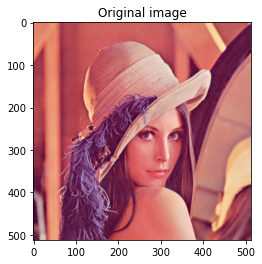

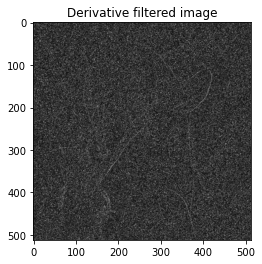

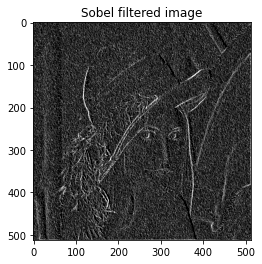

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,util,color
# (0)
def compass_method(img):
    img_a=np.copy(img)
    img_filtered_a=np.copy(img)
    kernel_range=int(((9)**0.5)//2)
    # a) Simple derivative kernel
    for i in range(1,img_a.shape[0]):
        for j in range(1,img_a.shape[1]):
            dx=img_a[i,j]-img_a[i,j-1]
            dy=img_a[i,j]-img_a[i-1,j]
            img_filtered_a[i,j]=np.sqrt(np.square(dx)+np.square(dy))
    
    # b) Sobel kernel
    img_b=np.copy(img)
    img_filtered_b=np.copy(img)
    
    c=2
    
    F1=np.array([[1,c,1],
                 [0,0,0],
                 [-1,-c,-1]])*1/c
    
    F2=np.array([[0,1,c]
                 ,[-1,0,1]
                 ,[-c,-1,0]])*1/c
    
    F3=np.array([[-1,0,1],
                 [-c,0,c],
                 [-1,0,1]])*1/c
    
    F4=np.array([[-c,-1,0],
                [-1,0,1],
                [0,1,c]])*1/c
    
    Sobels=[F1,F2,F3,F4]
    
    for i in range(kernel_range,img.shape[0]-kernel_range):
        for j in range(kernel_range,img.shape[1]-kernel_range):
            S=img_b[i-kernel_range:i+kernel_range+1,j-kernel_range:j+kernel_range+1]
            Sobel=[np.sum(S*F) for F in Sobels]
            
            img_filtered_b[i,j]=max(Sobel)
            
    return img_filtered_a,img_filtered_b

#(1)

img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)*255

#(2)
sigma = 30
N = np.random.normal(0, sigma, img_gray.shape)

# add the noise over the image. 
img_noise=np.copy(img_gray)
# Add the additive white noise
img_noise=img_noise+N 
# Take into account that the resulting image should have integer values in [0, 255] 
img_noise[img_noise>=255]=255
img_noise[img_noise<=0]=0

img_filtered_a,img_filtered_b=compass_method(img_noise)

plt.figure(), plt.imshow(img_original)
plt.title("Original image")
plt.figure(), plt.imshow(img_filtered_a,cmap='gray',vmin=0,vmax=255)
plt.title("Derivative filtered image")
plt.figure(), plt.imshow(img_filtered_b,cmap='gray',vmin=0,vmax=255)
plt.title("Sobel filtered image")



            
        
    